                                                  ****UBER ANAYSIS****

#### Content
- **Geography:** USA, Sri Lanka and Pakistan

- **Time period:** January - December 2016

- **Unit of analysis:** Drives

- **Total Drives:** 1,155

- **Total Miles:** 12,204


### Dataset Description: 
 > **The dataset contains Start Date, End Date, Start Location, End Location, Miles Driven and Purpose of drive (Business, Personal, Meals, Errands, Meetings, Customer Support etc.)**

**Describing Importing Libraries**

### Data Analysis

**PANDAS :**
    Pandas are data structures and data analysis tools for manipulating numeric data and time series that are high-performance, rapid, and simple to use. Pandas is written in Python, Cython, and C and is based on the numpy library. We may import data into pandas from a variety of file formats, including JSON, SQL, and Microsoft Excel.

***NUMPY:***
       - - It is a Python package that is used to execute scientific computations. It offers high-performance multidimensional arrays as well as the tools needed to work with them. A numpy array is a grid of values (of the same type) indexed by a tuple of positive integers. Numpy arrays are quick, simple to grasp, and allow users to conduct calculations across arrays.
       
       
 ### Data Visualizations
 The graphic depiction of data is known as data visualisation. It helps with data analysis and prediction by converting a large dataset into little graphs.
       
**MATPLOTLIB**
It's a Python package that helps you plot graphs using other Python libraries like Numpy and Pandas. In Python, it's a useful tool for visualising data. It's used to draw 2D graphs of arrays and create statical interferences.

**SEABORN:**
- It's also a Python library that works with Matplotlib, Pandas, and Numpy to plot graphs. It is a superset of the Matplotlib library and is constructed on top of it. It aids in the representation of univariate and bivariate data.

#### Import Libraries

In [ ]:
# Analysis and Mathematical  Libraries
import numpy as np

import pandas as pd

# Visualizations Libraries

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# DateTime Libraries
import time, datetime

# Escape Warnings

import warnings
warnings.filterwarnings('ignore')

## <font color='Blue' face='Cursive'> Importing DataSet </font>

<b> The data set is in csv format and may be imported using the pandas library's [read csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read csv.html). Because this is an original copy, give it a meaningful name when importing it. <br><br> </b>

We'll also verify the first five rows of the data set to see if it's been imported correctly.

In [ ]:
# Read the data of UBER 
# Here file is CSV i.e Comma Seperated Values
#df is a variable
#encoding = 'latin1'Fixing encoding errors in Pandas
#In fact, Pandas assumes that text is in UTF-8 format, because it is so common.
#In this case, as the filename suggests, the bytes for the text are in Latin 1 encoding.
#We can tell Pandas about this with the encoding= option: 

df = pd.read_csv("/content/My Uber Drives - 2016.csv")
df.head(3)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


**Here we can see that, Columns having special characters  we must remove special characters like '*'.**



In [ ]:
df.columns = df.columns.str.replace("*","")

In [ ]:
df.tail(1)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


**Above information says Miles is float tye and rest of columns are objective**

In [ ]:
df.shape

(1156, 7)

In [ ]:
print("There are {} rows and {} columns are present in the Data Set".format(df.shape[0],df.shape[1]))

There are 1156 rows and 7 columns are present in the Data Set


In [ ]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


## Handling Missing Values

- **Caution** : Always have backup of the orginal data. If you are deleting missing values


In [ ]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

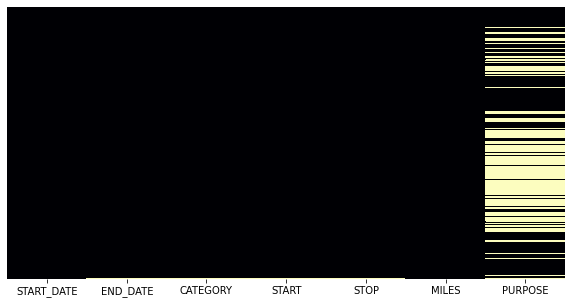

In [ ]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5)) 
sns.heatmap(df.isnull(),cmap='magma',yticklabels=False,cbar=False)
plt.show()

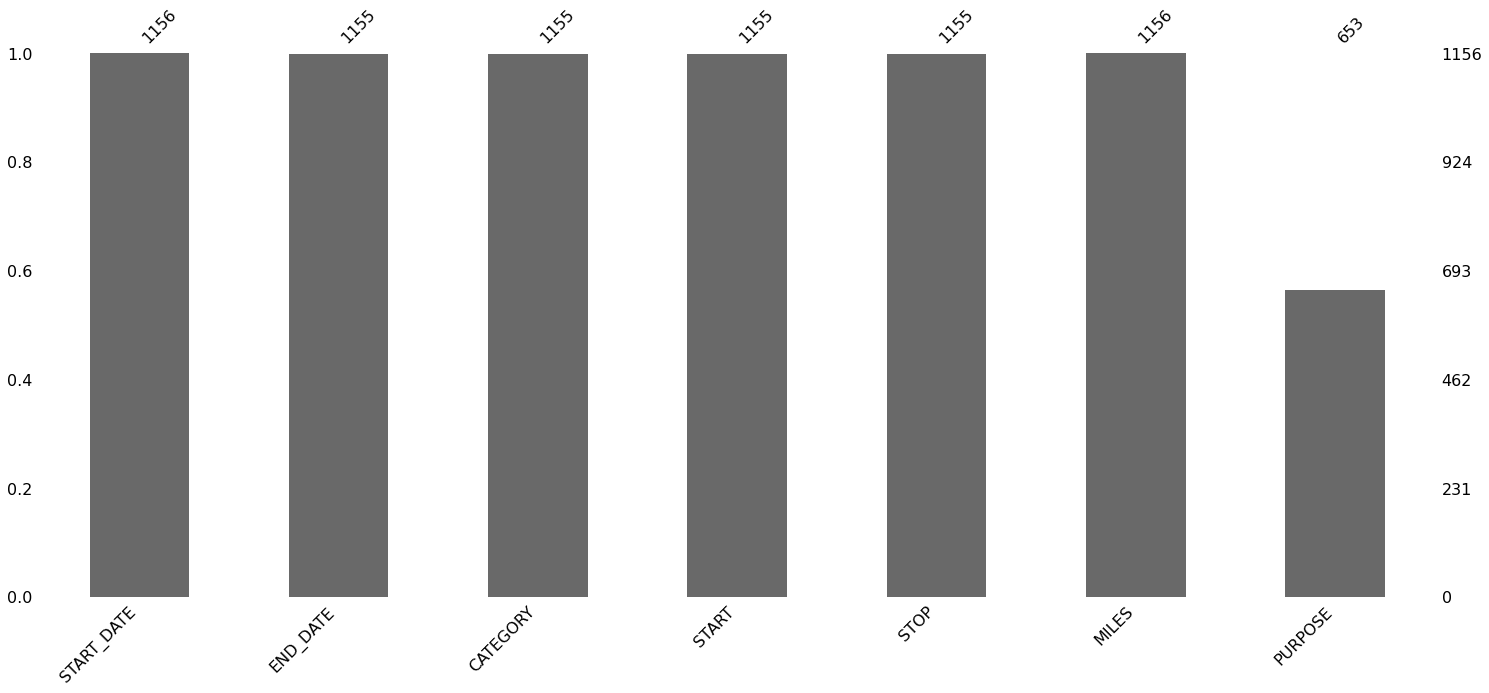

In [ ]:
#visualizing the null values for each attribute


import missingno as msno

msno.bar(df)
plt.show()

In [ ]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

In [ ]:
df.drop(index = 1155, axis = 0, inplace = True)

In [ ]:
df.isnull().sum()


START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [ ]:
df["PURPOSE"].isnull().sum()/len(df)




0.43463203463203465

**In the PURPOSE COLUMN, we can observe that there are 43 percent of null values in the dataset.**

**Above Purpose column has 502 null values its a categorial**

In [ ]:
# filling a null values using fillna() 
#ffill means forwadrd fill   (  non-null values forward)
df["PURPOSE"].fillna(method='ffill', inplace = True) 

In [ ]:
df.isnull().sum()


START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64


### Lets calculate the duration, to find the relation of it to PURPOSE of Cab ride.

In [ ]:
df['START_DATE']= pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']= pd.to_datetime(df['END_DATE'],errors='coerce')
df.info();


# Now time object type changes to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


**Numerical and float data are the only types of data that can be described. The mean, median, mode, and standard deviation are all displayed here.**

#### Missingo :

  >          Missingno is a library for visualizing incompleteness in a dataset, it works on top of Matplotlib
         and Seaborn, and it’s effortless to use
           

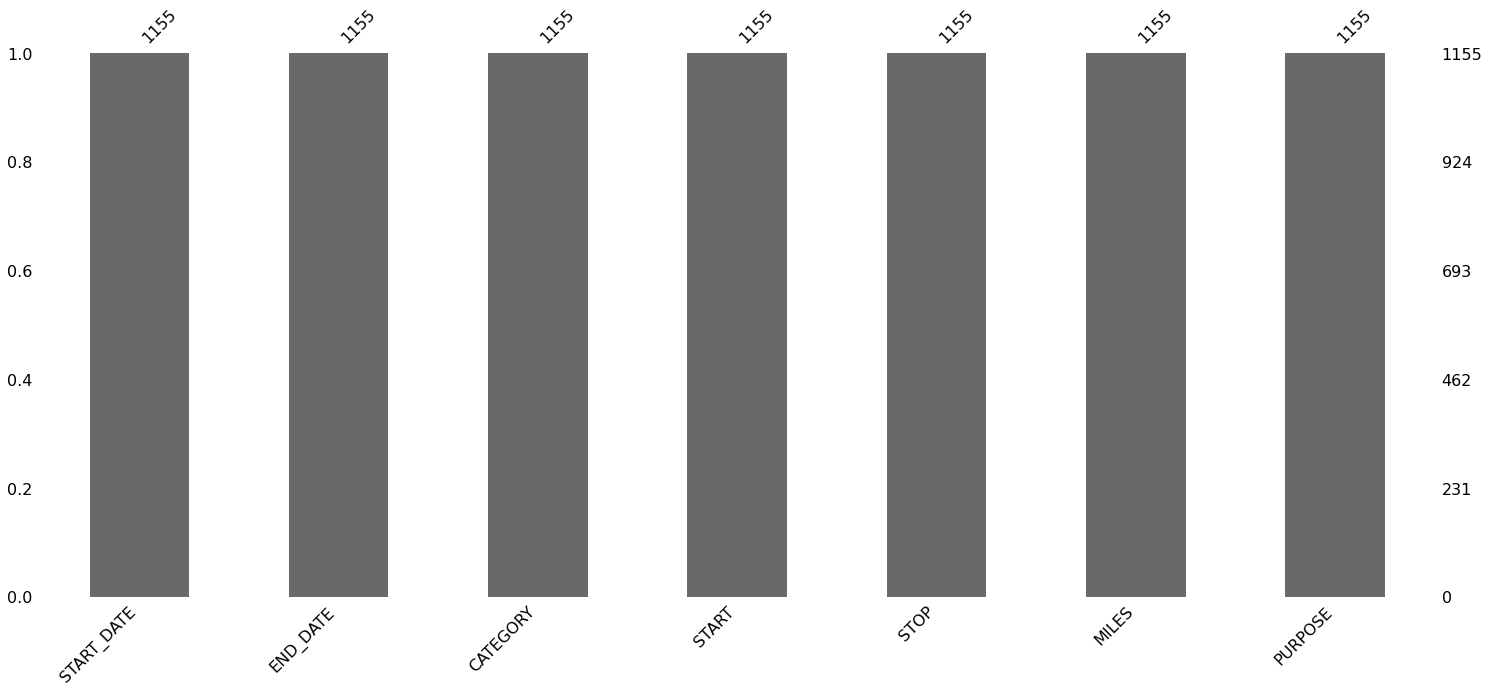

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

**Now you can see there is no missing values visually**

####  Preprocess on cloumns

In [ ]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

#### Start Date and End Date 


In [ ]:
df['START_DATE']= pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']= pd.to_datetime(df['END_DATE'],errors='coerce')
df.info();


# Now time object type changes to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


col_0,Count of travels as per category
CATEGORY,
Business,1078
Personal,77


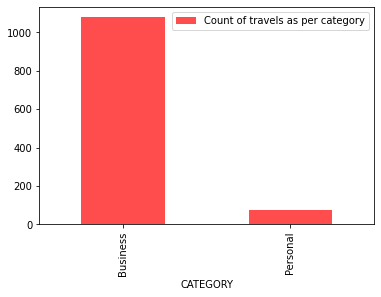

In [ ]:

Category =pd.crosstab(index=df['CATEGORY'],columns='Count of travels as per category')

Category.plot(kind='bar',color='r',alpha=0.7)
plt.legend()
Category


### Places with have HIGHEST START points

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
R?walpindi           11
Name: START, dtype: int64


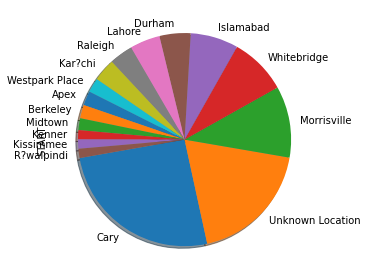

In [ ]:
Start_point = df.START.value_counts()
Start_point
print(Start_point[Start_point > 10])


Start_point[Start_point > 10].plot(kind = "pie", shadow=True, startangle=190)
plt.tight_layout()
plt.show()


**Above pie chart can understand that, Cary, Unknown Location Morrisville ,Whitebridge are highest satrting point**

### Places with LOWEST START point

In [ ]:
Start_point = df.START.value_counts()
Start_point
Start_point[Start_point <=  10]

New Orleans       10
Emeryville        10
Downtown           9
Edgehill Farms     8
Central            8
                  ..
Florence           1
Ridgeland          1
Daytona Beach      1
Sky Lake           1
Gampaha            1
Name: START, Length: 161, dtype: int64



**Above are start_pont are low number of starting points**

### Places with HIGHEST STOP point

In [ ]:
Stop_point = df.STOP.value_counts()
Stop_point
Stop_point[Stop_point >=  10]

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Edgehill Farms       10
New Orleans          10
Kenner               10
Name: STOP, dtype: int64

**Note**

> Cary, Unknown Location, Morrisville, Whitebridge, and the area adjacent to Islamabad are the highest stop points. 
> The highest stop points are not the same as the highest end points; there is a distinction.

### Places with LOWEST STOP point

In [ ]:
Stop_point = df.STOP.value_counts()
Stop_point
Stop_point[Stop_point <=  10]

Edgehill Farms       10
New Orleans          10
Kenner               10
Emeryville            9
Central               9
                     ..
Daytona Beach         1
Sand Lake Commons     1
Sky Lake              1
Vista East            1
Ilukwatta             1
Name: STOP, Length: 173, dtype: int64

> **Above are the lowest stop points**


### MILES MOST

9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
2.5     19
1.7     18
1.8     18
2.2     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
5.5     14
1.4     14
1.6     13
7.9     13
2.7     12
2.3     12
6.2     12
5.7     12
2.9     12
1.5     12
6.0     11
4.9     11
7.7     11
5.1     11
1.0     11
Name: MILES, dtype: int64


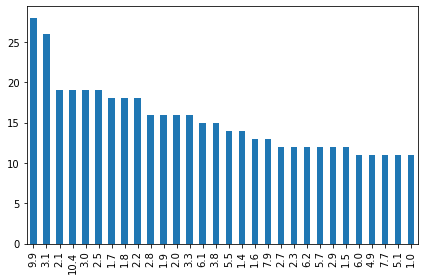

In [ ]:
Miles = df.MILES.value_counts()
Miles
print(Miles[Miles> 10])


Miles[Miles> 10].plot(kind = "bar")
plt.tight_layout()
plt.show()


col_0,Count of Miles
MILES,
False,840
True,315


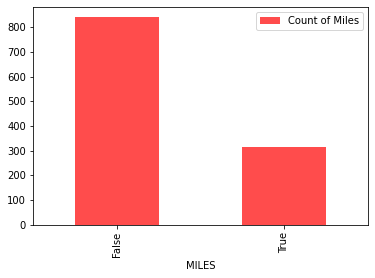

In [ ]:


Miles =pd.crosstab(index=df["MILES"]>10,columns='Count of Miles')

Miles.plot(kind='bar',color='r',alpha=0.7)
plt.legend()
Miles


**Greater than 10 miles**

In [ ]:
print(df.PURPOSE.value_counts())

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64


### Purpose of most cab rides

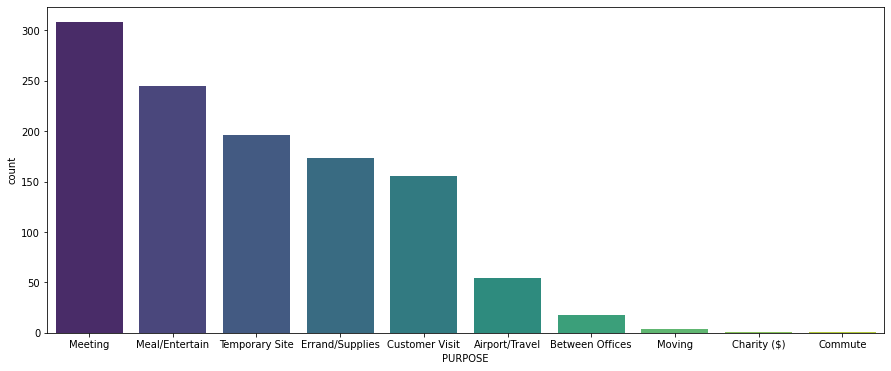

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(df['PURPOSE'], order=df['PURPOSE'].value_counts().index, palette='viridis')
plt.show()

**To examine if there's a pattern, we'll group Purpose by Miles.**

In [ ]:
# For future Analysis


# Lets calculate the duration, as there might be some relation of it to PURPOSE of Cab ride.
df['MINUTES'] = df.END_DATE - df.START_DATE
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00


In [ ]:
# As Duration is in datetime format, we need to convert it to float type in order to use it for analysis.
df['MINUTES'] = df['MINUTES'].dt.total_seconds() /60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


## Analysis and Visualization

**To examine if there is a pattern, we'll group Purpose by Miles.**

In [ ]:
pd.DataFrame({'MEAN': df.groupby(['PURPOSE'])['MILES'].mean().round(1), 
              'MIN' : df.groupby(['PURPOSE'])['MILES'].min(), 
              'MAX' : df.groupby(["PURPOSE"])['MILES'].max()}).reset_index()

,PURPOSE,MEAN,MIN,MAX
0,Airport/Travel,15.0,0.9,156.9
1,Between Offices,10.9,1.9,39.2
2,Charity ($),15.1,15.1,15.1
3,Commute,180.2,180.2,180.2
4,Customer Visit,16.1,0.6,310.3
5,Errand/Supplies,5.9,0.5,195.3
6,Meal/Entertain,5.8,0.6,36.5
7,Meeting,12.7,0.7,201.0
8,Moving,4.6,3.3,6.1
9,Temporary Site,11.0,0.7,195.6


###  BOX Plot for better Visualization
>MILES and MINUTES separated by PURPOSE in a BOX plot

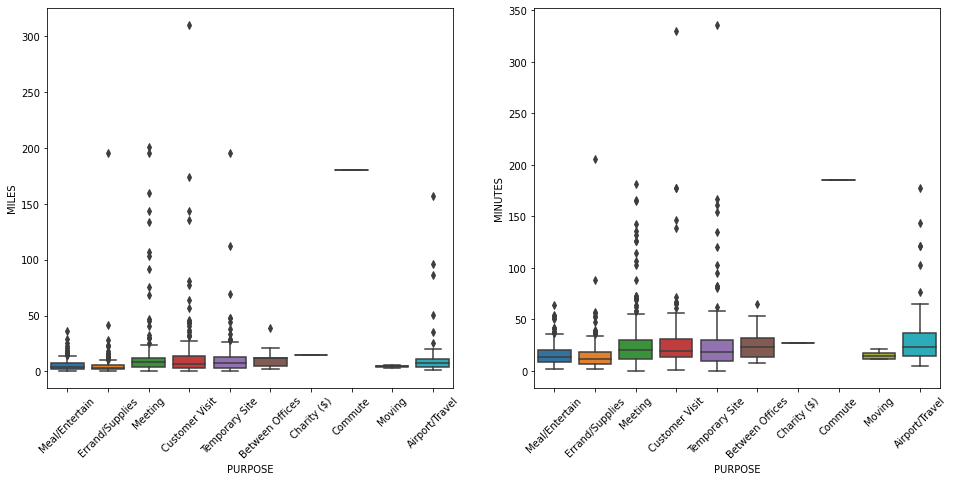

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES)
plt.xticks(rotation=45);

**MILES and MINUTES boxplots without outliers depending on PURPOSE**

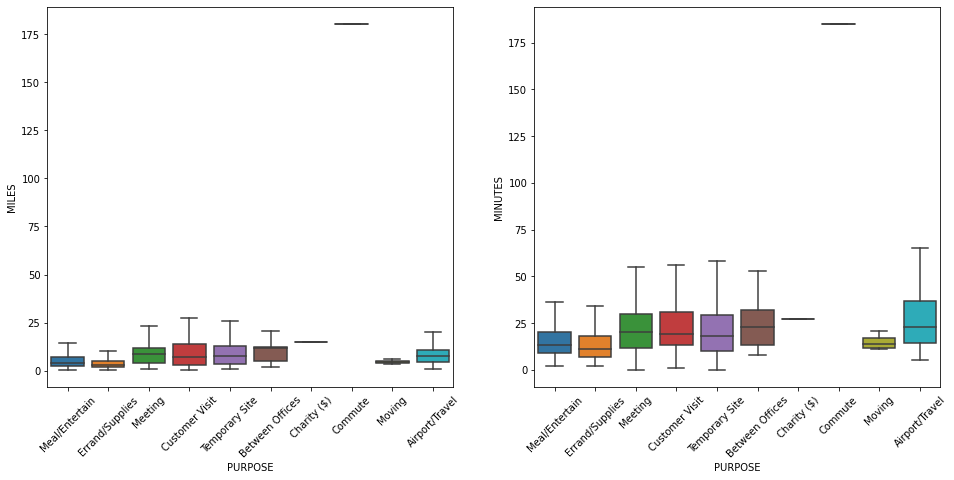

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES,showfliers=False)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES,showfliers=False)
plt.xticks(rotation=45);

**Counting the number of ROUND TRIPS (those with the same start and stop places).**

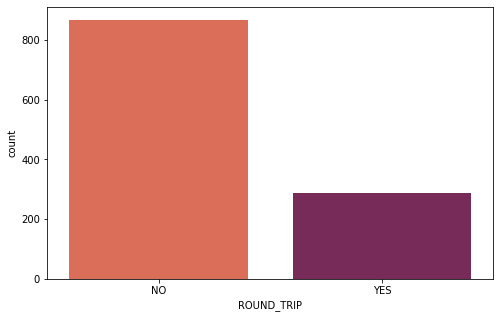

In [ ]:
# For this purpose, we need to make a function
plt.figure(figsize=(8,5))
def round(x):
    if x['START'] == x['STOP']:
        return 'YES'
    else:
        return 'NO'
    
df['ROUND_TRIP'] = df.apply(round, axis=1)

sns.countplot(df['ROUND_TRIP'], order=df['ROUND_TRIP'].value_counts().index, palette='rocket_r')
plt.show()

**There are very less number of ROUND Trips.** so (yes is low numb i.e round trip)

### Entering Month Name and evaluating Frequency of Trip in each Month

In [ ]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month

In [ ]:
dic = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep',
      10: 'Oct', 11: 'Nov', 12: 'Dec' }

df['MONTH'] = df['MONTH'].map(dic)



# MAP FUNCTION : Its a build in function
#       1. This function is used to apply a function to all the elements of a sequence(list,tuple.strings) 


**When are cab rides more popular (frequently used)?**

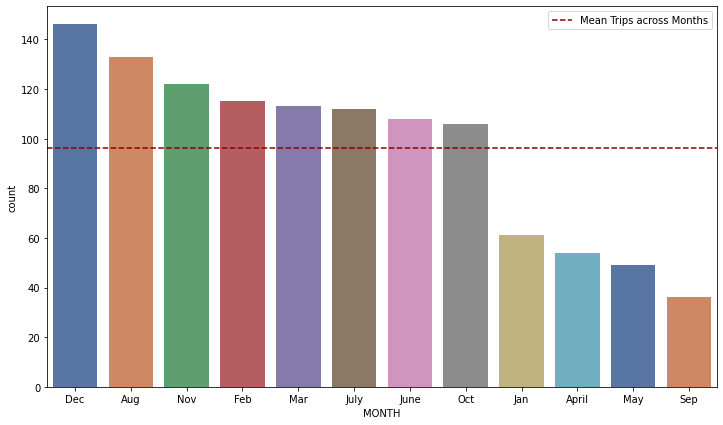

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(df['MONTH'], order=df['MONTH'].value_counts().index, palette='deep')
plt.axhline(df['MONTH'].value_counts().mean(),linestyle='--', color = 'darkred', label='Mean Trips across Months')
plt.legend()
plt.show()

**Round Trip against Months**

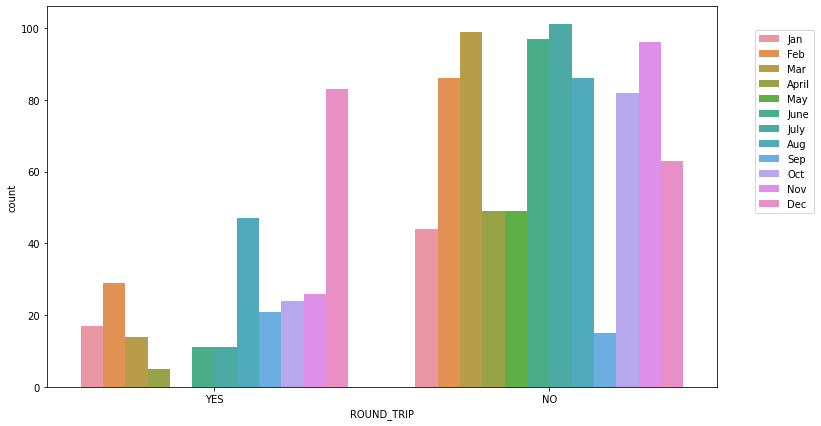

In [ ]:
plt.figure(figsize=(12,7))
a=sns.countplot(df['ROUND_TRIP'],hue=df['MONTH'])
plt.legend(bbox_to_anchor=(1.05, 0.95), loc=2)
plt.show()

### PURPOSE of Cab ride vary with time and distance

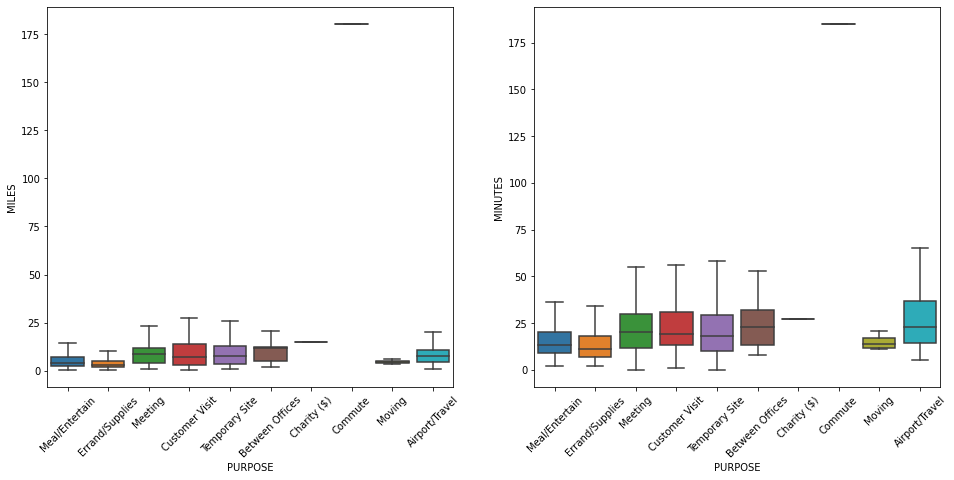

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES, showfliers = False)
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES, showfliers = False)
plt.xticks(rotation = 45);

#### Is the distance proportional to the duration?

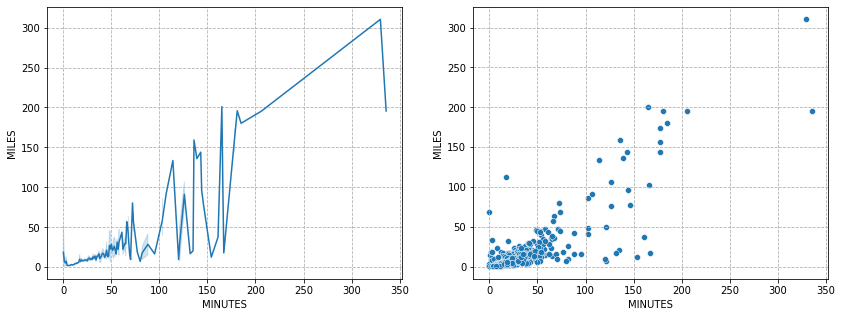

In [ ]:
#Plots of MILES with respect to MINUTES



plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
sns.lineplot(data=df, x=df.MINUTES, y=df.MILES)
plt.grid(True, linestyle = "--")
plt.subplot(1,2,2)
sns.scatterplot(data=df, x=df.MINUTES, y=df.MILES)
plt.grid(True, linestyle = "--")

**Our usual thinking, that distance equals time, is contradicted by the fact that some cab rides were longer for shorter distances.**

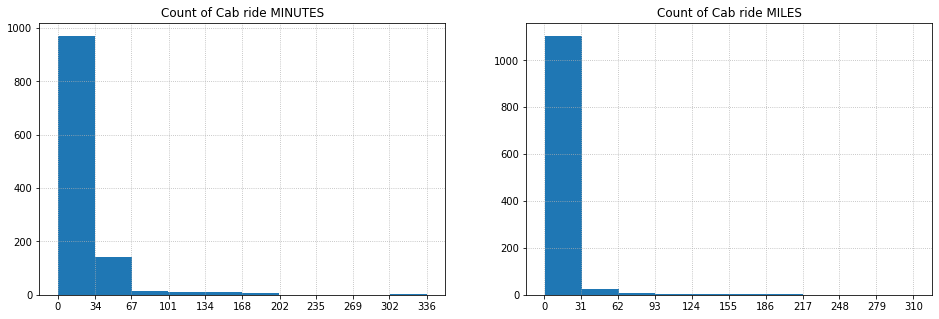

In [ ]:
# cab rides took more time for less distance.

plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
n, bins, patches = plt.hist(df.MINUTES)
plt.xticks(bins.round())
plt.grid(True, linestyle = "dotted")
plt.title("Count of Cab ride MINUTES")

plt.subplot(1,2,2)
n, bins, patches = plt.hist(df.MILES)
plt.xticks(bins.round())
plt.grid(True, linestyle = "dotted")
plt.title("Count of Cab ride MILES");

### Distribution of Cab rides based on Category


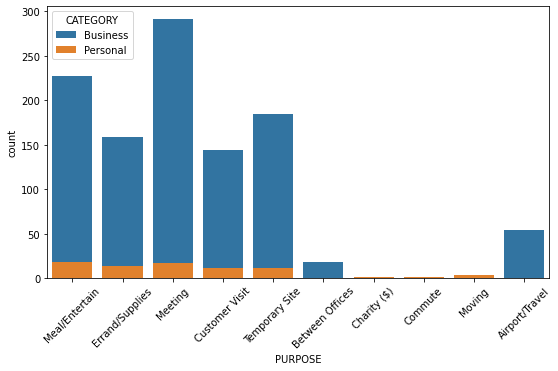

In [ ]:
plt.figure(figsize = (9,5))
sns.countplot(data=df,x="PURPOSE", hue = 'CATEGORY', dodge = False)
plt.xticks(rotation = 45);

**The above plot makes clear distinction on the Purpose of Business rides and Personal rides.
This may give insight to cab aggregators to decide which sector to introduce new cabs in.**

### Where do customers most frequently take cabs?
> **Frequency of Cab Rides START**

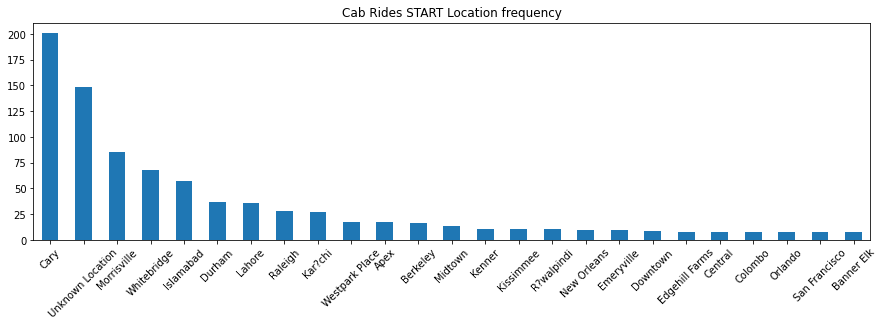

In [ ]:
plt.figure(figsize = (15,4))
pd.Series(df['START']).value_counts()[:25].plot(kind="bar")
plt.title("Cab Rides START Location frequency")
plt.xticks(rotation = 45);

## Frequency of Cab Rides STOP

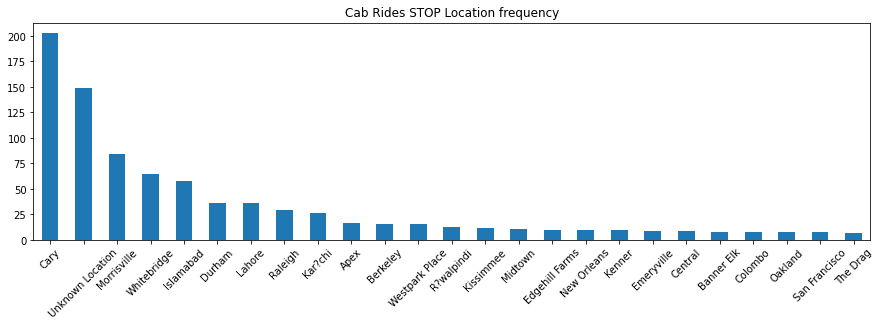

In [ ]:
plt.figure(figsize=(15,4))
pd.Series(df['STOP']).value_counts()[:25].plot(kind = "bar")
plt.title("Cab Rides STOP Location frequency")
plt.xticks(rotation = 45);

### How many miles was earned per category and purpose ?

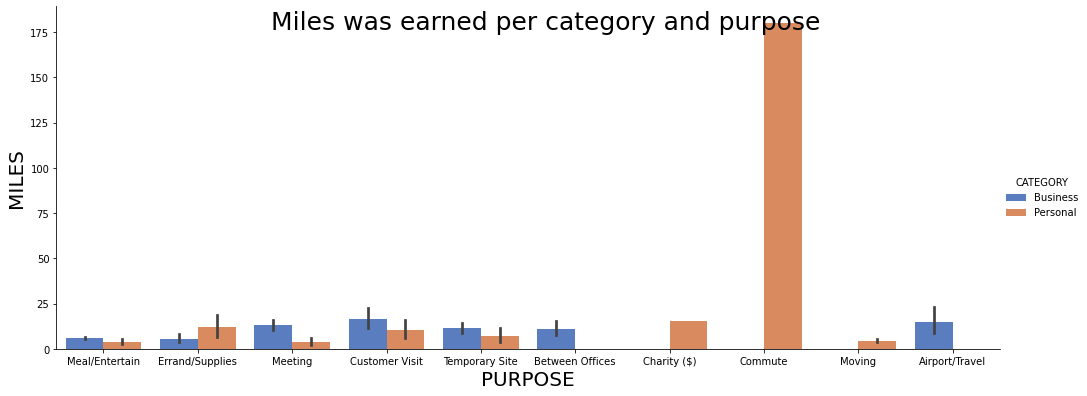

In [ ]:
g = sns.factorplot(x="PURPOSE", y="MILES", hue="CATEGORY", data=df,
                   size=15, kind="bar", palette="muted")
#from the graph is clearly seen that the main contributors for miles are:
#in Business category: meetings and customer; private: commute and charity 
g.fig.suptitle('Miles was earned per category and purpose', fontsize= 25)
g.fig.set_size_inches(15, 5)
g.set_xlabels('PURPOSE', fontsize= 20)
g.set_ylabels('MILES', fontsize= 20)

# Conclusion

> - The majority of cab rides are under 31 miles long and take roughly 34 minutes.
> - Business cab rides are more expensive not only in terms of volume but also in terms of distance travelled.
> - Meal/Entertainment, Customer visit, Meeting, Errand/Supplies are the most common applications of cab travels.
> - Cab traffic is centred primarily in five cities or towns.
> - A seasonal pattern in cab ride volume exists, with December being the busiest.